# Ex 7.1 Calculations and Splitting Columns  

- [**Part 1: Shoes**](#Part-1:-Shoes)  
- [**Part 2: Product Sales (w3schools)**](#Part-2:-w3schools)  
  - Question 2.1 What are our Top 10 Selling Products?  
  - Question 2.2 What are our Bottom 10 Selling Products?  
- [**Part 3: IMDB_250_Scraped.csv**](#Part-3:-IMDB_250_Scraped.csv--(Recap))  
  - Q3.1 What Were the Average Ratings by Year from 2000 onward?  
  - Question 3.2 The Number of Movie in the top 250 by Year?  


In [20]:
import pandas as pd
import plotly_express as px

# Part 1: Shoes    

In [21]:
# Hardcode a dataframe
df_shoes = pd.DataFrame(
    [
    [1,'2018-05-02',' Pumps   ','7 (EU)','Gold','$25,100','CA-121'],
    [2,'2018-05-03','   Pumps ','4 (EU)','Gold','$35,500','CA-235'],
    [3,'2018-06-04',' Loafer ','6 (EU)','Gold','$50,000','NY-12'],
    ], 
    columns=['OrderID','Order Date','Shoe_Type','Size','Colour','Sales','StoreID'])

df_shoes

,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID
0,1,2018-05-02,Pumps,7 (EU),Gold,"$25,100",CA-121
1,2,2018-05-03,Pumps,4 (EU),Gold,"$35,500",CA-235
2,3,2018-06-04,Loafer,6 (EU),Gold,"$50,000",NY-12


In [22]:
df_shoes['Shoe_Type']

0     Pumps   
1       Pumps 
2      Loafer 
Name: Shoe_Type, dtype: object

### Get rid of all extra spaces in the *Shoe_Type* column

In [23]:
df_shoes['Shoe_Type'] = df_shoes['Shoe_Type'].str.strip()

In [24]:
df_shoes['Shoe_Type']

0     Pumps
1     Pumps
2    Loafer
Name: Shoe_Type, dtype: object

### 1.2. Split the *StoreID* column into two columns:  StateAbbrev and SubstateID

In [25]:
df_shoes.head()

,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID
0,1,2018-05-02,Pumps,7 (EU),Gold,"$25,100",CA-121
1,2,2018-05-03,Pumps,4 (EU),Gold,"$35,500",CA-235
2,3,2018-06-04,Loafer,6 (EU),Gold,"$50,000",NY-12


In [26]:
df_split = df_shoes['StoreID'].str.split('-',1, expand=True)
df_split.head()

,0,1
0,CA,121
1,CA,235
2,NY,12


In [27]:
df_split.columns = ['StateAbbrev', 'SubstateID']
df_split.head()

,StateAbbrev,SubstateID
0,CA,121
1,CA,235
2,NY,12


In [28]:
df_shoes2 = pd.concat([df_shoes, df_split], axis='columns')
df_shoes2.head()

,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID,StateAbbrev,SubstateID
0,1,2018-05-02,Pumps,7 (EU),Gold,"$25,100",CA-121,CA,121
1,2,2018-05-03,Pumps,4 (EU),Gold,"$35,500",CA-235,CA,235
2,3,2018-06-04,Loafer,6 (EU),Gold,"$50,000",NY-12,NY,12


### Get rid of non-numeric junk in Sales field

In [29]:
df_shoes2['Sales'] = df_shoes2['Sales'].str.replace('$', '')
df_shoes2['Sales'] = df_shoes2['Sales'].str.replace(',', '')
df_shoes2.head(2)


,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID,StateAbbrev,SubstateID
0,1,2018-05-02,Pumps,7 (EU),Gold,25100,CA-121,CA,121
1,2,2018-05-03,Pumps,4 (EU),Gold,35500,CA-235,CA,235


### Get rid of non-numeric junk in Size field

In [30]:
df_shoes2['Size'] = df_shoes2['Size'].str.replace('(', '')
df_shoes2['Size'] = df_shoes2['Size'].str.replace('EU', '')
df_shoes2['Size'] = df_shoes2['Size'].str.replace(')', '')
df_shoes2.head(2)


,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID,StateAbbrev,SubstateID
0,1,2018-05-02,Pumps,7,Gold,25100,CA-121,CA,121
1,2,2018-05-03,Pumps,4,Gold,35500,CA-235,CA,235


### Change Data Types

In [31]:
df_shoes2.dtypes

OrderID         int64
Order Date     object
Shoe_Type      object
Size           object
Colour         object
Sales          object
StoreID        object
StateAbbrev    object
SubstateID     object
dtype: object

In [32]:
df_shoes2['Size'] = pd.to_numeric(df_shoes2['Size']).astype(int)
df_shoes2['Sales'] = pd.to_numeric(df_shoes2['Sales']).astype(float)
df_shoes_split = df_shoes2 
df_shoes_split.dtypes

OrderID          int64
Order Date      object
Shoe_Type       object
Size             int32
Colour          object
Sales          float64
StoreID         object
StateAbbrev     object
SubstateID      object
dtype: object

In [33]:
df_shoes_split.head(2)

,OrderID,Order Date,Shoe_Type,Size,Colour,Sales,StoreID,StateAbbrev,SubstateID
0,1,2018-05-02,Pumps,7,Gold,25100.0,CA-121,CA,121
1,2,2018-05-03,Pumps,4,Gold,35500.0,CA-235,CA,235


# Part 2: w3schools      
1. Join the following w3schools data: *OrderDetails* (Left), *Orders*, *Products*   
3. After the Joins, add a new calculated column to your dataframe: **LineTotal**  
  1. LineTotal should be the Price * the Quantity for every row

In [34]:
df_details = pd.read_excel('Data/w3schools_Data.xlsx', 'OrderDetails', skiprows=2)
df_details.head()

,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40


In [35]:
df_orders = pd.read_excel('Data/w3schools_Data.xlsx', 'Orders')
df_orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2


In [36]:
df_od_ord = pd.merge(df_details, df_orders, on='OrderID', how='left' )

print(df_od_ord.shape)
df_od_ord.head()

(518, 8)


,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,OrderDate,ShipperID
0,1,10248,11,12,90,5,1996-07-04,3
1,2,10248,42,10,90,5,1996-07-04,3
2,3,10248,72,5,90,5,1996-07-04,3
3,4,10249,14,9,81,6,1996-07-05,1
4,5,10249,51,40,81,6,1996-07-05,1


In [37]:
df_prod = pd.read_excel('Data/w3schools_Data.xlsx', 'Products', skiprows=2)
df_prod.head()

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18.00
1,2,Chang,1,1,24 - 12 oz bottles,19.00
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35


In [38]:
df_od_ord_prod = pd.merge(df_od_ord, df_prod, on='ProductID', how='left' )

print(df_od_ord_prod.shape)
df_od_ord_prod.head()

(518, 13)


,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,OrderDate,ShipperID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,10248,11,12,90,5,1996-07-04,3,Queso Cabrales,5,4,1 kg pkg.,21.00
1,2,10248,42,10,90,5,1996-07-04,3,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00
2,3,10248,72,5,90,5,1996-07-04,3,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80
3,4,10249,14,9,81,6,1996-07-05,1,Tofu,6,7,40 - 100 g pkgs.,23.25
4,5,10249,51,40,81,6,1996-07-05,1,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00


In [39]:
df_od_ord_prod['LineTotal'] = df_od_ord_prod['Price'] * df_od_ord_prod['Quantity']
df_od_ord_prod.head(3)

,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,OrderDate,ShipperID,ProductName,SupplierID,CategoryID,Unit,Price,LineTotal
0,1,10248,11,12,90,5,1996-07-04,3,Queso Cabrales,5,4,1 kg pkg.,21.0,252.0
1,2,10248,42,10,90,5,1996-07-04,3,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.0,140.0
2,3,10248,72,5,90,5,1996-07-04,3,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.8,174.0


## Question 2.1 What are our Top 10 Selling Products?

In [40]:
df_group = df_od_ord_prod.groupby('ProductName').sum()

print(df_group.shape)
df_group.head()

(77, 11)


,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,ShipperID,SupplierID,CategoryID,Price,LineTotal
ProductName,,,,,,,,,,,
Alice Mutton,2755,113758,187,331,509,45,22,77,66,429.0,12909.0
Aniseed Syrup,530,20694,6,80,58,8,4,2,4,20.0,800.0
Boston Crab Meat,1694,82613,320,256,360,38,16,152,64,147.2,4710.4
Camembert Pierrot,3095,124130,720,430,659,43,28,336,48,408.0,14620.0
Carnarvon Tigers,1099,51652,90,106,215,17,12,35,40,312.5,6625.0


In [41]:
df_group.reset_index(inplace=True)
print(df_group.shape)
df_group.head()

(77, 12)


,ProductName,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,ShipperID,SupplierID,CategoryID,Price,LineTotal
0,Alice Mutton,2755,113758,187,331,509,45,22,77,66,429.0,12909.0
1,Aniseed Syrup,530,20694,6,80,58,8,4,2,4,20.0,800.0
2,Boston Crab Meat,1694,82613,320,256,360,38,16,152,64,147.2,4710.4
3,Camembert Pierrot,3095,124130,720,430,659,43,28,336,48,408.0,14620.0
4,Carnarvon Tigers,1099,51652,90,106,215,17,12,35,40,312.5,6625.0


In [42]:
df_group.sort_values(by='LineTotal', ascending=False, inplace=True)
print(df_group.shape)
df_group.head()

(77, 12)


,ProductName,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,ShipperID,SupplierID,CategoryID,Price,LineTotal
11,Côte de Blaye,2331,72606,266,239,347,32,16,126,7,1844.50,62976.50
68,Thüringer Rostbratwurst,2505,93168,261,168,353,53,21,108,54,1114.11,20796.72
51,Raclette Courdavault,3384,144731,826,346,577,72,30,392,56,770.00,19030.00
66,Tarte au sucre,2937,134311,806,325,623,50,28,377,39,640.90,16022.50
3,Camembert Pierrot,3095,124130,720,430,659,43,28,336,48,408.00,14620.00


In [43]:
columns_to_keep = ['ProductName',  'LineTotal']

df_keep = df_group[columns_to_keep]

print(df_keep.shape)
df_keep.head()

(77, 2)


,ProductName,LineTotal
11,Côte de Blaye,62976.50
68,Thüringer Rostbratwurst,20796.72
51,Raclette Courdavault,19030.00
66,Tarte au sucre,16022.50
3,Camembert Pierrot,14620.00


In [44]:
df_top_products = df_keep.iloc[:10]
df_top_products

,ProductName,LineTotal
11,Côte de Blaye,62976.50
68,Thüringer Rostbratwurst,20796.72
51,Raclette Courdavault,19030.00
66,Tarte au sucre,16022.50
3,Camembert Pierrot,14620.00
0,Alice Mutton,12909.00
17,Gnocchi di nonna Alice,10222.00
40,Mozzarella di Giovanni,9396.00
74,Vegie-spread,9175.10
36,Manjimup Dried Apples,8639.00


In [45]:
df_top_products = df_top_products[::-1]

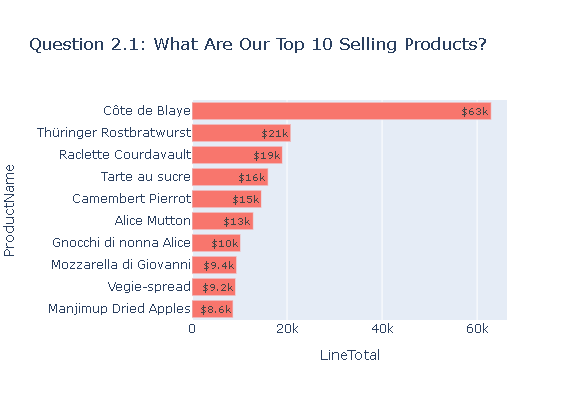

In [78]:
fig = px.bar(df_top_products,
            x='LineTotal',
            y='ProductName',
            width=900,
            height=400,
            text= 'LineTotal',
            title='Question 2.1: What Are Our Top 10 Selling Products?')

fig.update_traces( texttemplate='%{text:$.2s}',
                   marker_color ='#f8766d',
                 )

fig.show()

In [47]:
df_group.sort_values(by='LineTotal', ascending=True, inplace=True)
print(df_group.shape)
df_group.head()

(77, 12)


,ProductName,OrderDetailID,OrderID,ProductID,Quantity,CustomerID,EmployeeID,ShipperID,SupplierID,CategoryID,Price,LineTotal
32,Laughing Lumberjack Lager,99,10284,67,5,44,4,1,16,1,14.0,70.0
56,Røgede sild,372,10388,45,15,72,2,1,21,8,9.5,142.5
13,Filo Mix,796,31044,156,48,214,17,6,72,15,21.0,336.0
25,Gustaf's Knäckebröd,504,20686,44,18,100,11,3,18,10,42.0,378.0
16,Genen Shouyu,286,20606,30,25,85,7,4,12,4,31.0,387.5


In [48]:
columns_to_keep = ['ProductName',  'LineTotal']

df_keep = df_group[columns_to_keep]

print(df_keep.shape)
df_keep.head()

(77, 2)


,ProductName,LineTotal
32,Laughing Lumberjack Lager,70.0
56,Røgede sild,142.5
13,Filo Mix,336.0
25,Gustaf's Knäckebröd,378.0
16,Genen Shouyu,387.5


In [49]:
df_bottom10 = df_keep.iloc[:10]
df_bottom10.head()

,ProductName,LineTotal
32,Laughing Lumberjack Lager,70.0
56,Røgede sild,142.5
13,Filo Mix,336.0
25,Gustaf's Knäckebröd,378.0
16,Genen Shouyu,387.5


In [50]:
df_bottom10 = df_bottom10[::-1]

## Question 2.2 What are our Bottom 10 Selling Products?

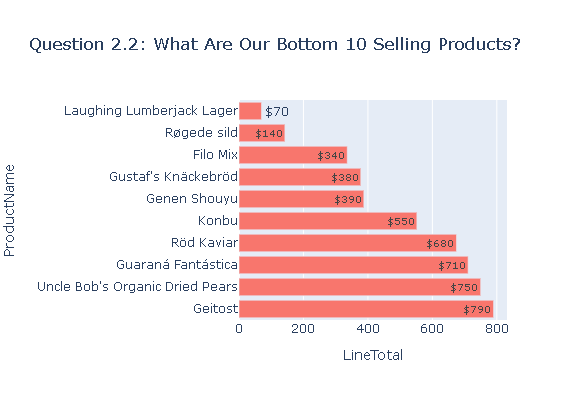

In [79]:
fig = px.bar(df_bottom10,
            x='LineTotal',
            y='ProductName',
            width=900,
            height=400,
            text= 'LineTotal',
            orientation='h',
            title='Question 2.2: What Are Our Bottom 10 Selling Products?')

fig.update_traces(textposition='auto', 
                  texttemplate='%{text:$.2s}',
                   marker_color ='#f8766d',
                 )

fig.show()

# Part 3: IMDB_250_Scraped.csv  (Recap)  
- Data Source:  **IMDB_250_Scraped.csv**  

In [52]:
df_scrap = pd.read_csv('Data/IMDB_250_Scraped.csv')
print(df_scrap.shape)
df_scrap.head()

(250, 5)


,Column1,Rank & Title,IMDb Rating,Your Rating,2
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN
1,NaN,2. The Godfather (1972),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN
3,NaN,4. The Dark Knight (2008),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN
4,NaN,5. 12 Angry Men (1957),8.9,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN


In [53]:
df_scrap.columns
df_scrap.dtypes

Column1         float64
Rank & Title     object
IMDb Rating     float64
Your Rating      object
2               float64
dtype: object

In [54]:
df_split2 = df_scrap['Rank & Title'].str.split('.',1, expand=True)
df_split2.head()

,0,1
0,1,The Shawshank Redemption (1994)
1,2,The Godfather (1972)
2,3,The Godfather: Part II (1974)
3,4,The Dark Knight (2008)
4,5,12 Angry Men (1957)


In [55]:
df_split2.columns = ['Rank', 'Title1']
df_split2.head()

,Rank,Title1
0,1,The Shawshank Redemption (1994)
1,2,The Godfather (1972)
2,3,The Godfather: Part II (1974)
3,4,The Dark Knight (2008)
4,5,12 Angry Men (1957)


In [56]:
df_scrap2 = pd.concat([df_scrap, df_split2], axis='columns')
df_scrap2.head()

,Column1,Rank & Title,IMDb Rating,Your Rating,2,Rank,Title1
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,1,The Shawshank Redemption (1994)
1,NaN,2. The Godfather (1972),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,2,The Godfather (1972)
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,3,The Godfather: Part II (1974)
3,NaN,4. The Dark Knight (2008),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,4,The Dark Knight (2008)
4,NaN,5. 12 Angry Men (1957),8.9,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,5,12 Angry Men (1957)


In [57]:
df_scrap3 = df_scrap2['Title1'].str.split('(',1, expand=True)
df_scrap3.head()

,0,1
0,The Shawshank Redemption,1994)
1,The Godfather,1972)
2,The Godfather: Part II,1974)
3,The Dark Knight,2008)
4,12 Angry Men,1957)


In [58]:
df_scrap3.columns = ['Title', 'Year']
df_scrap3.head()

,Title,Year
0,The Shawshank Redemption,1994)
1,The Godfather,1972)
2,The Godfather: Part II,1974)
3,The Dark Knight,2008)
4,12 Angry Men,1957)


In [59]:
df_scrap4 = pd.concat([df_scrap2, df_scrap3], axis='columns')
df_scrap4.head()

,Column1,Rank & Title,IMDb Rating,Your Rating,2,Rank,Title1,Title,Year
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,1,The Shawshank Redemption (1994),The Shawshank Redemption,1994)
1,NaN,2. The Godfather (1972),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,2,The Godfather (1972),The Godfather,1972)
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,3,The Godfather: Part II (1974),The Godfather: Part II,1974)
3,NaN,4. The Dark Knight (2008),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,4,The Dark Knight (2008),The Dark Knight,2008)
4,NaN,5. 12 Angry Men (1957),8.9,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,5,12 Angry Men (1957),12 Angry Men,1957)


In [60]:
df_scrap4['Year'] = df_scrap4['Year'].str.replace(')', '')
df_scrap4.head()

,Column1,Rank & Title,IMDb Rating,Your Rating,2,Rank,Title1,Title,Year
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,1,The Shawshank Redemption (1994),The Shawshank Redemption,1994
1,NaN,2. The Godfather (1972),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,2,The Godfather (1972),The Godfather,1972
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,3,The Godfather: Part II (1974),The Godfather: Part II,1974
3,NaN,4. The Dark Knight (2008),9.0,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,4,The Dark Knight (2008),The Dark Knight,2008
4,NaN,5. 12 Angry Men (1957),8.9,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,5,12 Angry Men (1957),12 Angry Men,1957


In [61]:
cols_to_rename = {
                  'IMDb Rating':'Rating',
                  }

# Rename the columns inplace
df_scrap4.rename(columns=cols_to_rename, inplace=True)
df_scrap4.head(2)

,Column1,Rank & Title,Rating,Your Rating,2,Rank,Title1,Title,Year
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,1,The Shawshank Redemption (1994),The Shawshank Redemption,1994
1,NaN,2. The Godfather (1972),9.2,12345678910\r\nNOT YET RELEASED\r\nSeen,NaN,2,The Godfather (1972),The Godfather,1972


In [62]:
columns_to_keep2 = ['Rank','Title', 'Rating','Year']

df_keep2 = df_scrap4[columns_to_keep2]

print(df_keep2.shape)
df_keep2.head()

(250, 4)


,Rank,Title,Rating,Year
0,1,The Shawshank Redemption,9.2,1994
1,2,The Godfather,9.2,1972
2,3,The Godfather: Part II,9.0,1974
3,4,The Dark Knight,9.0,2008
4,5,12 Angry Men,8.9,1957


In [63]:
df_keep2.dtypes

Rank       object
Title      object
Rating    float64
Year       object
dtype: object

In [64]:
df_keep2['Year'] = pd.to_datetime(df_keep2['Year'])
df_keep2.head()

<ipython-input-64-f26acfad17b3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rank,Title,Rating,Year
0,1,The Shawshank Redemption,9.2,1994-01-01
1,2,The Godfather,9.2,1972-01-01
2,3,The Godfather: Part II,9.0,1974-01-01
3,4,The Dark Knight,9.0,2008-01-01
4,5,12 Angry Men,8.9,1957-01-01


In [65]:
df_keep2.dtypes

Rank              object
Title             object
Rating           float64
Year      datetime64[ns]
dtype: object

In [66]:
df_keep2['Year'] = pd.to_datetime(df_keep2['Year'])
df_keep2.dtypes

<ipython-input-66-309fd91be17c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rank              object
Title             object
Rating           float64
Year      datetime64[ns]
dtype: object

In [67]:
df_group_final = df_keep2.groupby('Year').mean()

print(df_group_final.shape)
df_group_final.head()

(83, 1)


,Rating
Year,
1921-01-01,8.30
1924-01-01,8.10
1925-01-01,8.20
1926-01-01,8.10
1927-01-01,8.15


In [68]:
df_group_final.reset_index(inplace=True)
df_group_final.head()

,Year,Rating
0,1921-01-01,8.30
1,1924-01-01,8.10
2,1925-01-01,8.20
3,1926-01-01,8.10
4,1927-01-01,8.15


In [69]:
df_2000_onward =  df_group_final.query(" Year >= 2000")

print(df_2000_onward.shape)
df_2000_onward.head(5)

(19, 2)


,Year,Rating
64,2000-01-01,8.266667
65,2001-01-01,8.300000
66,2002-01-01,8.360000
67,2003-01-01,8.266667
68,2004-01-01,8.150000


## Q3.1 What Were the Average Ratings by Year from 2000 onward?

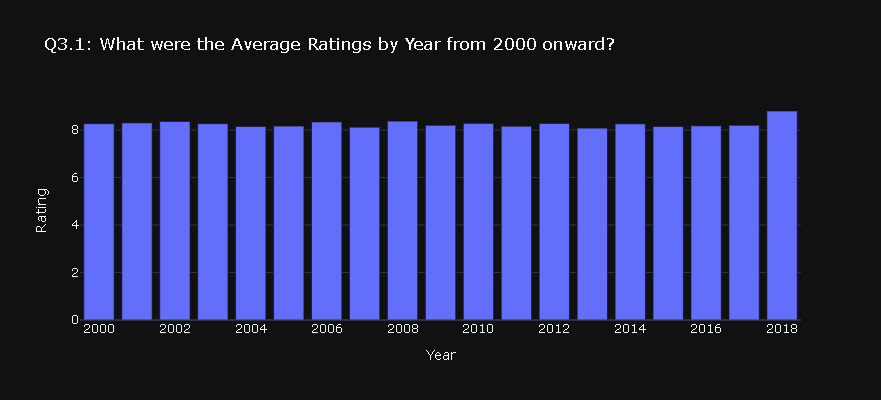

In [98]:
fig = px.bar(df_2000_onward,
            x='Year',
            y='Rating',
            width=900,
            height=400,
            template='plotly_dark',
            title='Q3.1: What were the Average Ratings by Year from 2000 onward?')
fig.update_traces(marker_color='#636efa')
fig.show()

## Q3.2 The Number of Movies in the top 250 by Year (1990 and after)?  


In [71]:
df_keep2.head()

,Rank,Title,Rating,Year
0,1,The Shawshank Redemption,9.2,1994-01-01
1,2,The Godfather,9.2,1972-01-01
2,3,The Godfather: Part II,9.0,1974-01-01
3,4,The Dark Knight,9.0,2008-01-01
4,5,12 Angry Men,8.9,1957-01-01


In [72]:
df_group_final2 = df_keep2.groupby('Year').count()

print(df_group_final2.shape)
df_group_final2.head()

(83, 3)


,Rank,Title,Rating
Year,,,
1921-01-01,1,1,1
1924-01-01,1,1,1
1925-01-01,1,1,1
1926-01-01,1,1,1
1927-01-01,2,2,2


In [73]:
df_group_final2.reset_index(inplace=True)
df_group_final2.head()

,Year,Rank,Title,Rating
0,1921-01-01,1,1,1
1,1924-01-01,1,1,1
2,1925-01-01,1,1,1
3,1926-01-01,1,1,1
4,1927-01-01,2,2,2


In [74]:
cols_to_rename = {
                  'Title':'Movie_Count',
                  }

# Rename the columns inplace
df_group_final2.rename(columns=cols_to_rename, inplace=True)
print(df_group_final2.shape)
df_group_final2.head()

(83, 4)


,Year,Rank,Movie_Count,Rating
0,1921-01-01,1,1,1
1,1924-01-01,1,1,1
2,1925-01-01,1,1,1
3,1926-01-01,1,1,1
4,1927-01-01,2,2,2


In [75]:
df_1990_onward =  df_group_final2.query(" Year >= 1990")

print(df_1990_onward.shape)
df_1990_onward.head(5)

(29, 4)


,Year,Rank,Movie_Count,Rating
54,1990-01-01,1,1,1
55,1991-01-01,3,3,3
56,1992-01-01,2,2,2
57,1993-01-01,4,4,4
58,1994-01-01,5,5,5


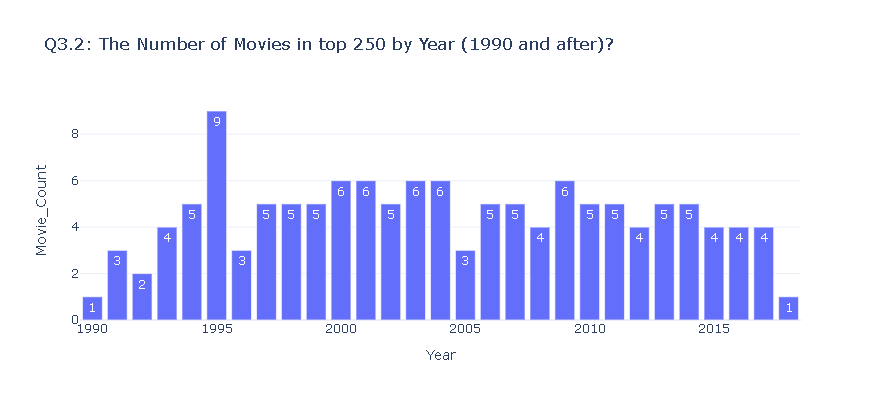

In [97]:
fig = px.bar(df_1990_onward,
            x='Year',
            y='Movie_Count',
            width=900,
            height=400,
            text='Movie_Count',
            template = 'plotly_white',
            title='Q3.2: The Number of Movies in top 250 by Year (1990 and after)?')

fig.update_traces(marker_color='#636efa')
fig.show()